Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**PRELIM EXAM** | **HANDS-ON EXAM**
**Name** | Figueras, Jose Enrico
**Section** | CPE31S3
**Date Performed**: | 09/27/2023
**Date Submitted**: | 09/29/2023
**Instructor**: | Engr. Roman M. Richard

<hr>

###PROCEDURES AND OUTPUT:

###1. Abstracting a video stream with managers.CaptureManager


Provide an analysis:
What are these additional functions’ intended functions? Provide a quick discussion on how they work by analyzing the parameters passed to the functions.


In [ ]:
import cv2
import numpy
import time

class CaptureManager(object):
  def __init__(self, capture, previewWindowManager = None, shouldMirrorPreview = False):
    self.previewWindowManager = previewWindowManager
    self.shouldMirrorPreview = shouldMirrorPreview

    self._capture = capture
    self._channel = 0
    self._enteredFrame = False
    self._frame = None
    self._imageFileName = None
    self._videoFileName = None
    self._videoEncoding = None
    self._videoWriter = None
    self._startTime = None
    self._framesElapsed = long(0)
    self._fpsEstimate

  @property
  def channel(self):
    return self._channel

  @channel.setter
  def channel(self, value):
    if self._channel != value:
      self._channel = value
      self._frame = None

  @property
  def frame(self):
    if self._enteredFrame and self._frame is None:
      _, self._frame = self._capture_retrieve()
    return self._frame

  @property
  def isWritingImage(self):
    return self._imageFileName is not None

  @property
  def isWritingVideo(self):
    return self.videFileName is not None

`Provide and analysis:`

**Is it necessary to use object-oriented approach in creating the application interface for our project?**
-	In this situation, I think that using object-oriented programming would be helpful especially to properly manage and organize the code, though it may not be necessary, this is better for handling the video interface of our project as there are also a lot of functions that are used, OOP is ideal.


**Why are certain attributes of the class defined with an underscore in the name? What does this do?**
-	What this does is that it classifies these attributes as private within that class, this helps the user understand that the values passed into these variables are only for internal use, to improve code stability and lessen unintentional changes.


**Explain the use of @property and other similarly confusing parts of this code. Refer to the appropriate Python documentation.**
-	From what I understood in the Python documentation, the use of the ‘@’ sign being applied to these codes is to define that the attribute following it may either be a getter or setter method, which can be accessed like regular attributes but may require additional modifications compared to regular ones.


In [ ]:
  # Addd the following functions to your managers.py

  def enterFrame(self):
    """Capture the next frame, if any."""

    # First, we will check if any previous frame was exited.
    assert not self._enteredFrame, \
      'previous enterFrame() had no matching exitFrame()'

    if self._capture is not None:
      self._enteredFrame = self._capture.grab()

  def exitFrame(self):
    """Draw to the window. Write to files. Release the frame."""

    # Check whether any grabbed frame is retriwvable
    # The getter may retrieve and cache the frame.
    if self.frame is None:
      self._enteredFrame = False
      return

    # Update the FPS estimate and related variables.
    if self._framesElapsed == 0:
      self._startTime = time.time()
    else:
      timeElapsed = time.time() - self._startTime
      self.fpsEstimate = self._framesElapsed / timeElapsed
    self._framesElapsed += 1

    # Draw to the window, if any.
    if self.previewWindowManager is not None:
      if self.shouldMirrorPreview:
        mirroredFrame = numpy.fliplr(self._frame).copy()
        self.previewWindowManager.show(mirroredFrame)
      else:
        self.previewWindowManager.show(self._frame)

    # Write to the image file, if any.
    if self.isWritingImage:
      cv2.imwrite(self._imageFileName, self._frame)
      self._imageFileName = None

    # Write to the video file, if any.
    self.writeVideoFrame()

    # Release the frame.
    self._frame = None
    self._enteredFrame = False

In [ ]:
  def writeImage(self, filename):
    """Write the next exited frame to an image file."""
    self._imageFileName = filename

  def startWritingVideo(
      self, filename,
      encoding = cv2.VideoWriter_fourcc('I','4','2','0')):
      """Start writing exited frames to a video file."""
      self._videoFileName = filename
      self._videoEncoding = encoding

  def stopWritingVideo(self):
    """Stop writing exited frames to a video file."""
    self._videoFileName = None
    self._videoEncoding = None
    self._videoWriter = None

  def _writeVideoFrame(self):
    if not self.isWritingVideo:
      return

    if self._videoWriter is None:
      fps = self._capture.get(cv2.CAP_PROP_FPS)
      if fps == 0.0:

        # The capture's FPS is unknown to use an estimate.
        if self._framesElapsed < 20:
          # Wait until more frames elapse so that the estimate is more stable.
          return

        else:
          fps = self.fpsEstimate

      size = (int(self._capture.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(self._capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

      self._videoWriter = cv2.VideoWriter(self._videoFileName,
                                          self._videoEncoding,
                                          fps, size)
    self._videoWriter.write(self._frame)

`Provide an analysis:`

**What are these additional functions’ intended functions? Provide a quick discussion on how they work by analyzing the parameters passed to the functions.**
- The purposes of these functions is to be able to start and stop writing images and videos into files, this will be useful as we store and save screenshot/s or video/s through our live video feed later.

###2. Abstracting a window and keyboard with managers.WindowManager

In [ ]:
class WindowManager(object):
  def _init_(self, windowName, keypressCallback = None):
    self.keypressCallback = keypressCallback
    self._windowName = windowName
    self._isWindowCreated = False

  @property
  def isWindowCreated(self):
    return self._isWindowCreated

  def createWindow(self):
    cv2.namedwindow(self._windowName)
    self._isWindowCreated = True

  def show(self, frame):
    cv2.imshow(self._windowName, frame)

  def destroyWindow(self):
    cv2.destroywindow(self._windowName)
    self._isWindowCreated = False

  def processEvents(self):
    keycode = cv2.waitKey(1)
    if self.keypressCallback is not None and keycode != -1:
    # Discard any non-ASCII info encoded by GTK.
        keycode &= 0xFF
        self.keypressCallback(keycode)

`Provide an analysis:`

**What are the identifiable drawbacks from this implementation**
- I think one of which is minimal error-handling and the use of lower-level OpenCV functions, which can make the program less user-friendly.


**Based on those drawbacks, what solutions can you implement to solve them?**
- Improve to a higher-level abstraction and improve also on error-handling, not sacrificing the use of lower-level OpenCV functions, but using it to create a better user interface, more accessible to the user.

###3. Applying everything with cameo.Cameo

In [ ]:
import cv2
from managers import WindowManager, CaptureManager

class Cameo(object):
  def __init__(self):
    self._windowManager = WindowManager('Cameo',
      self.onKeypress)
    self._captureManager = CaptureManager(
    cv2.VideoCapture(0), self._windowManager, True)

  def run(self):
    """Run the main loop."""
    self._windowManager.createwindow()
    while self._windowManager.isWindowCreated:
        self._captureManager.enterFrame()
        frame = self._captureManager.frame
        # TODO: Filter the frame
        self._captureManager.exitFrame()
        self._windowManager.processEvents()

  def onKeypress (self, keycode):
    """Handle a keypress.
    space -> Take a screenshot.
    tab -> Start/stop recording a screencast.
    escape -> Quit.
      """
    if keycode == 32: # space
      self._captureManager.writeImage('screenshot.png')
    elif keycode == 9: # tab
        if not self._captureManager.iswritingVideo:
          self._captureManager.startwritingVideo(
            'screencast.avi')
        else:
          self._captureManager.stopWritingVideo()
    elif keycode == 27: # escape
        self._windowManager.destroyWindow()

###4. Implementation

Your tasks to verify implementation:
- **Run the application; make sure you now have a live camera feed. (Show screenshot)**
- **What happens when you take a screenshot?**

Answer: It writes the screenshoted frame to a file and saves it to the general photo directory of the user's computer.


- **Change the shouldMirrorPreview in the initialization of the CaptureManager class to False, take a screenshot again and show what happened. (Show screenshot)**

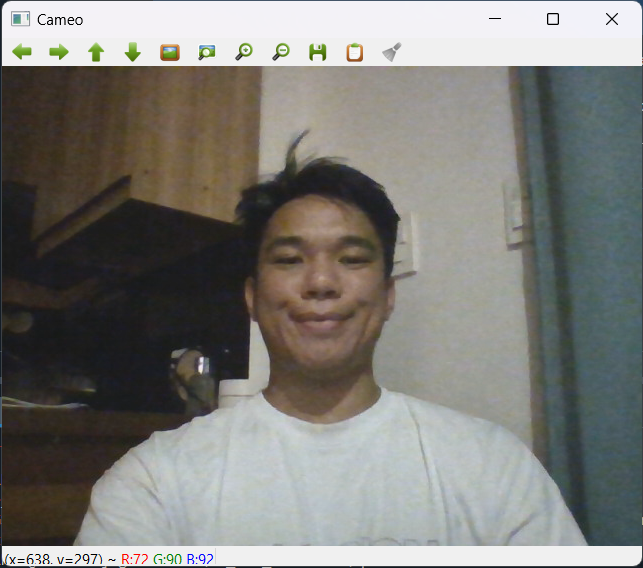



False

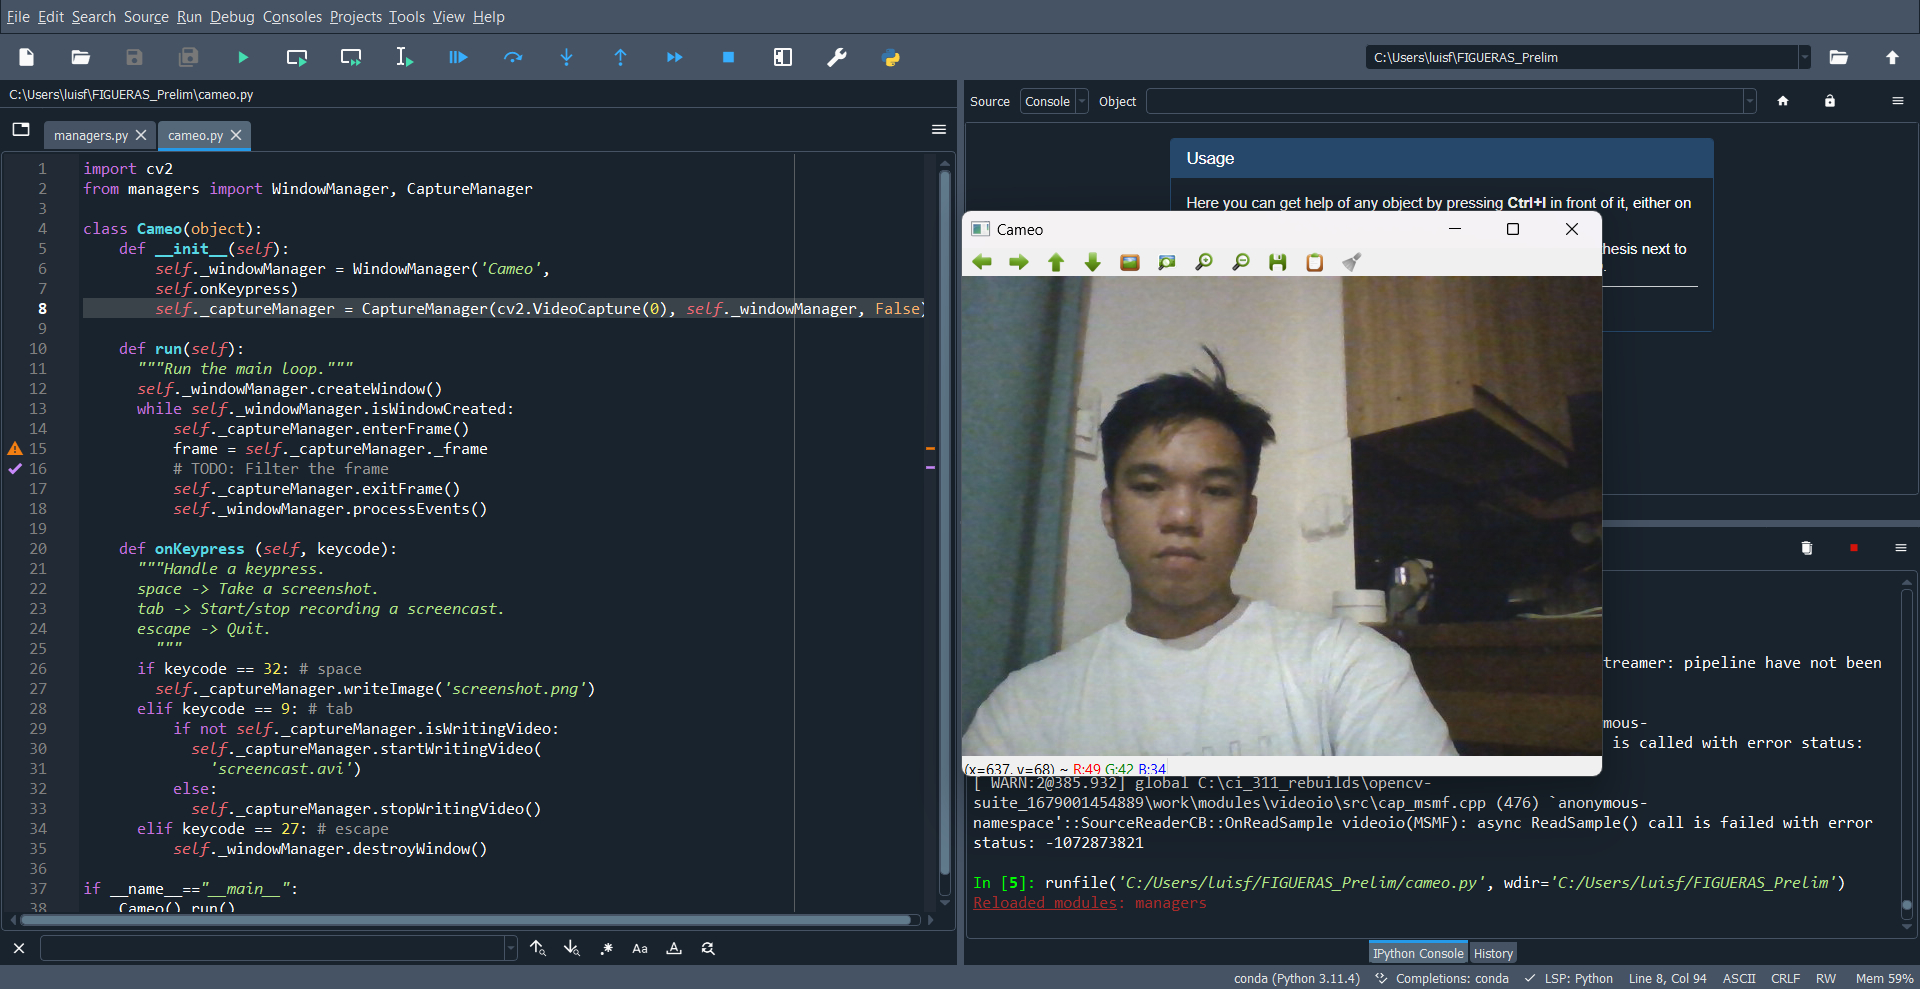

True

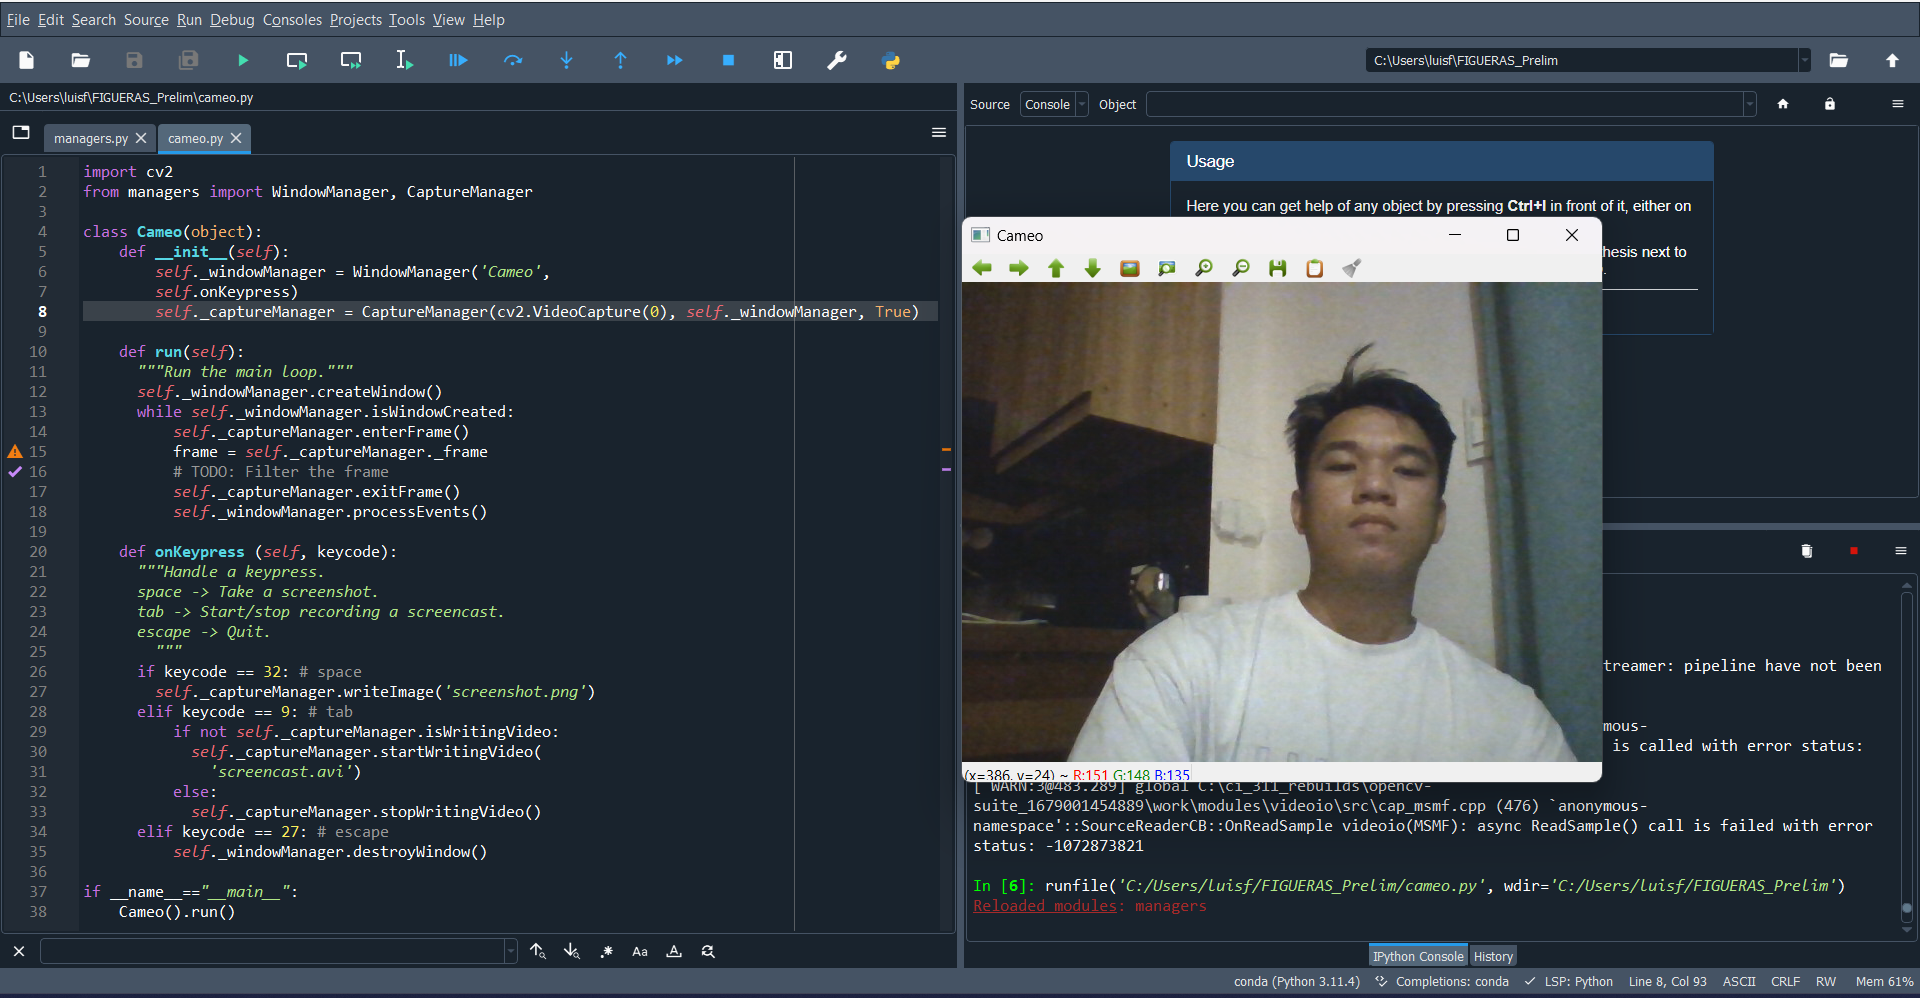

##Supplementary Activity

###Part 1:

Modify your cameo.py such that the following commented lines should appear in your code.

In [ ]:
import cv2
from managers import WindowManager, CaptureManager

class Cameo(object):
    def __init__(self):
        self._windowManager = WindowManager('Cameo',
        self.onKeypress)
        self._captureManager = CaptureManager(cv2.VideoCapture(0), self._windowManager, True)
        #self._curveFilter = filters.BGRPortraCurveFilter()

    def run(self):
      """Run the main loop."""
      self._windowManager.createWindow()
      while self._windowManager.isWindowCreated:
          self._captureManager.enterFrame()
          frame = self._captureManager._frame
          #filters.strokeEdges(frame, frame)
          #self._curveFilter.apply(frame, frame)
          self._captureManager.exitFrame()
          self._windowManager.processEvents()

Detail the necessary steps taken to apply all the filters previously  created to the live video feed captured for the supplementary activity. Show screenshot for each.

Sharpen Filter:
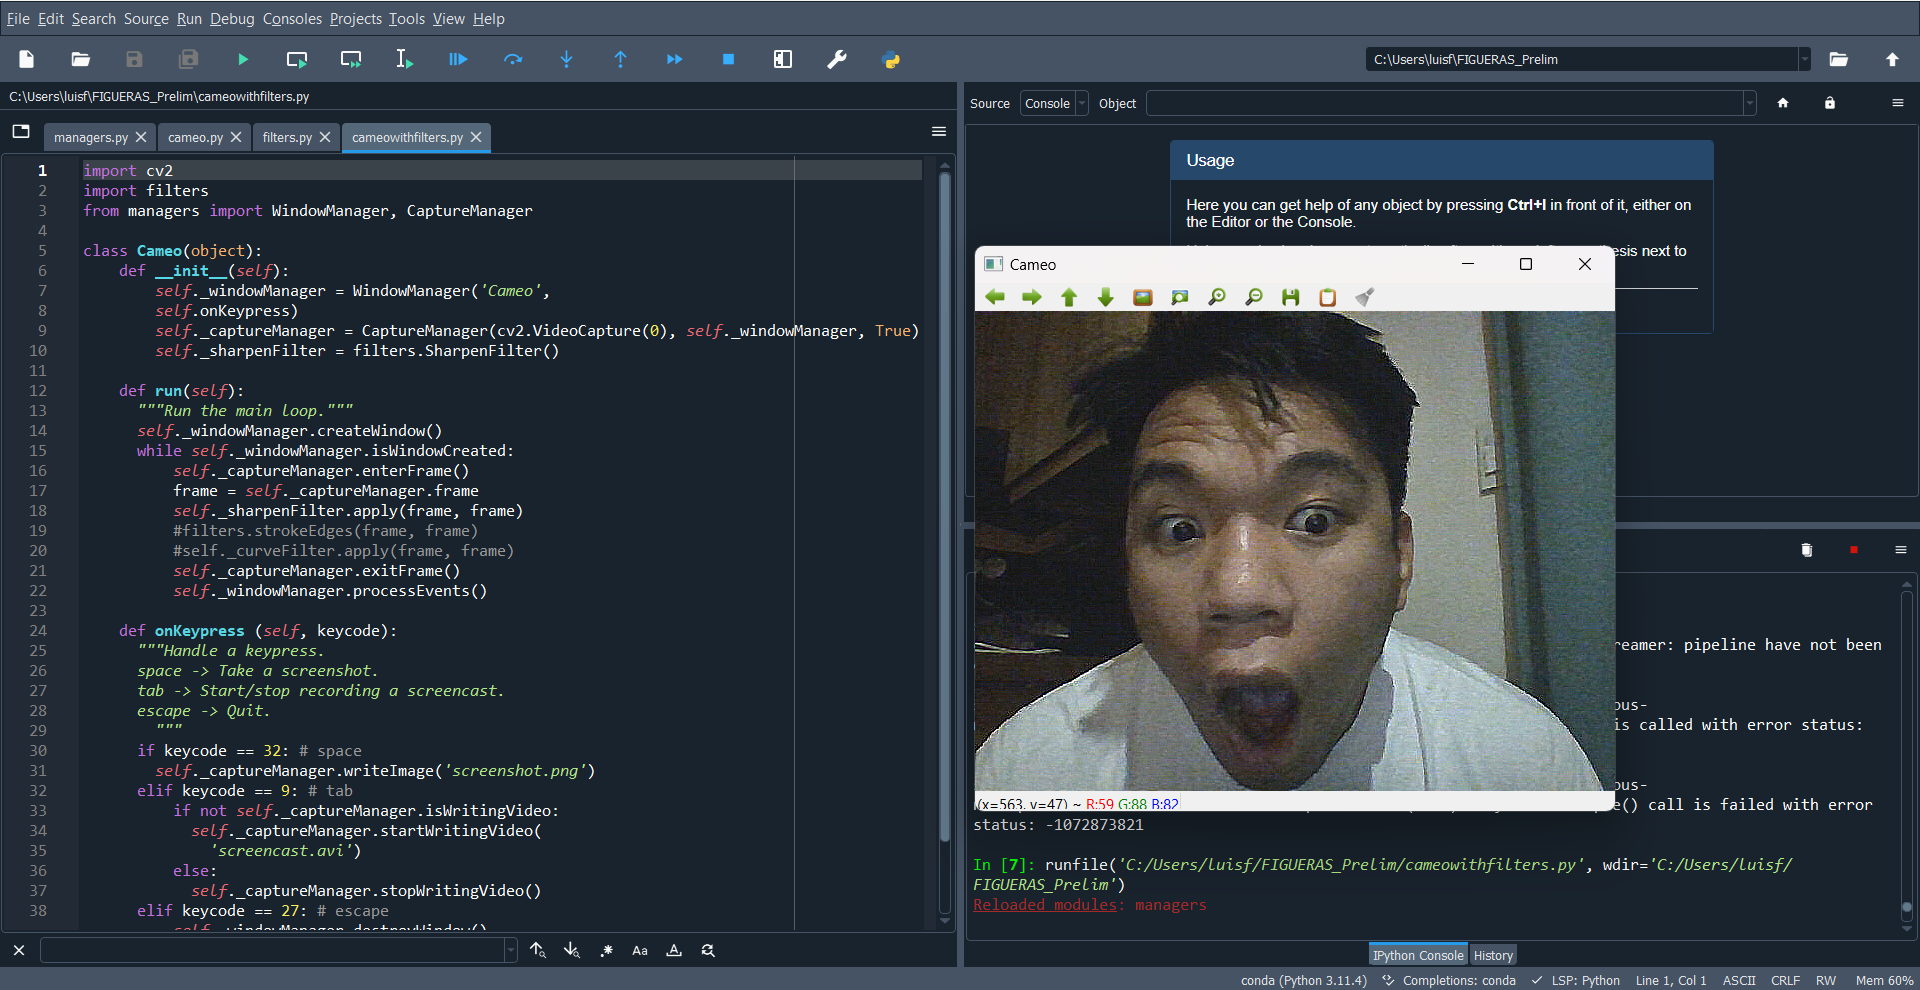

Find Edges Filter:
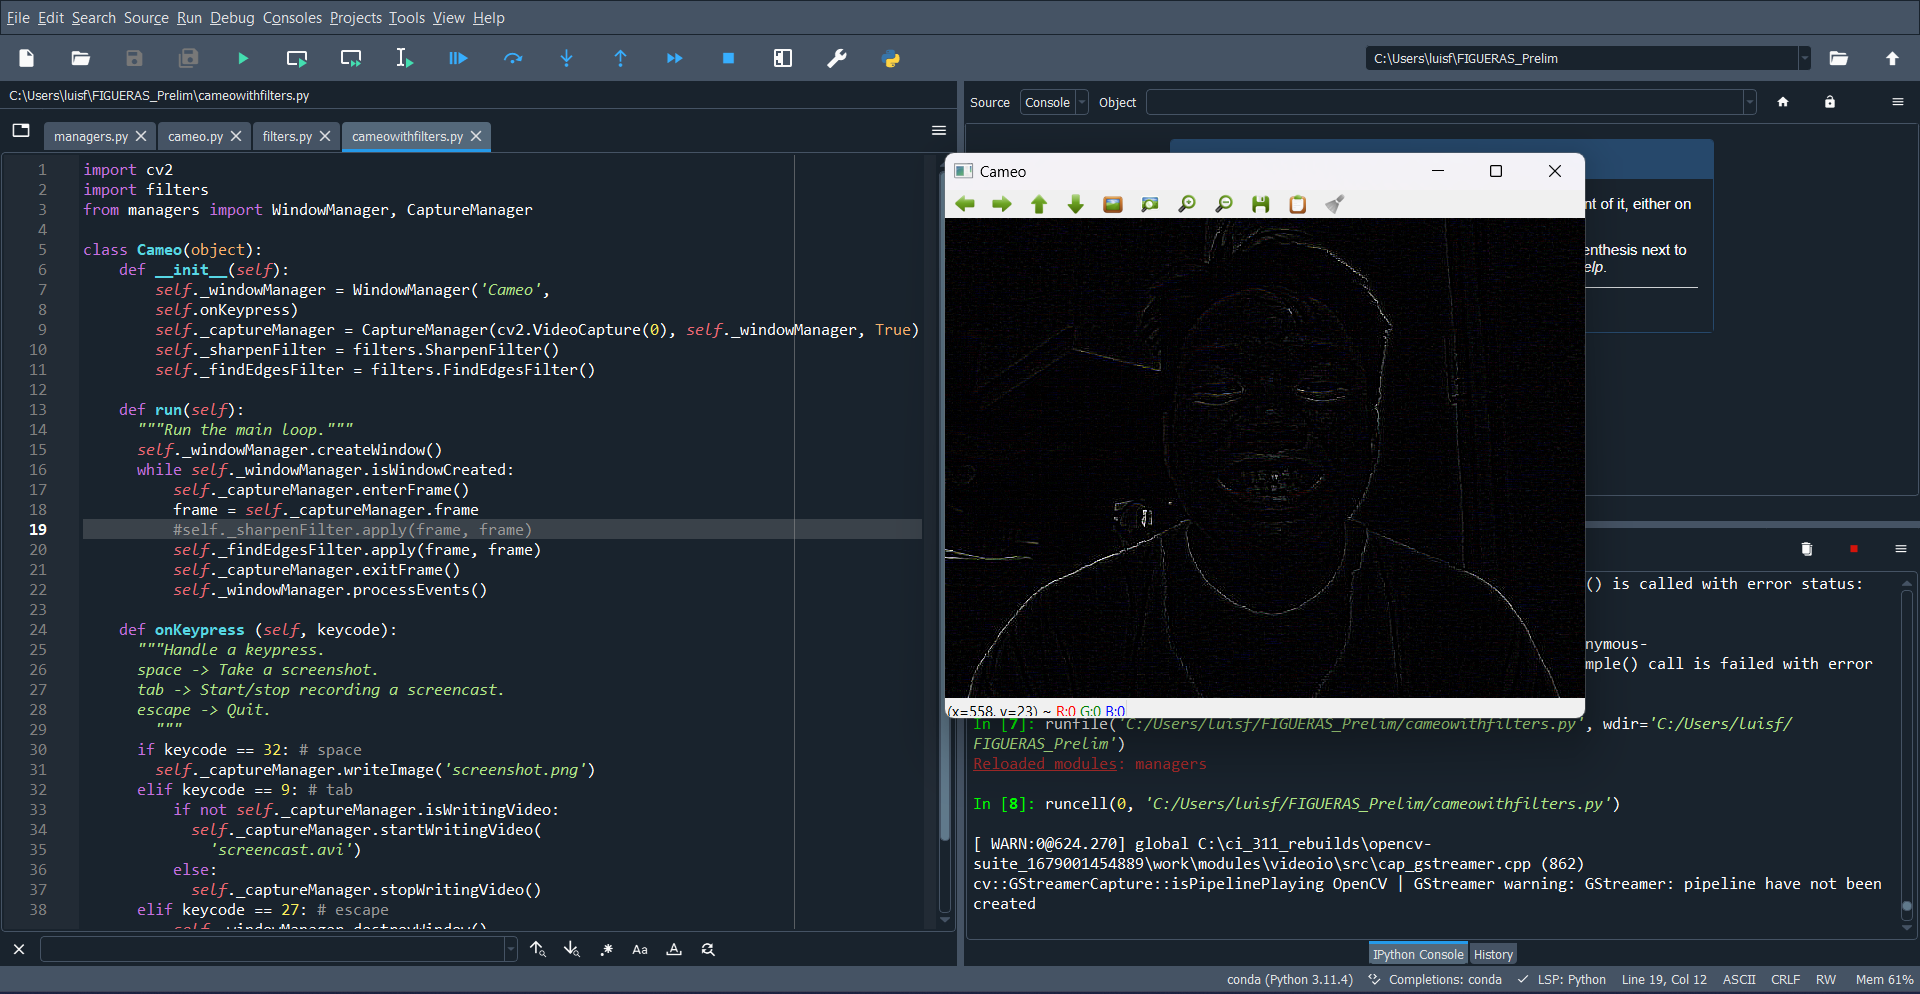

Blur Filter:
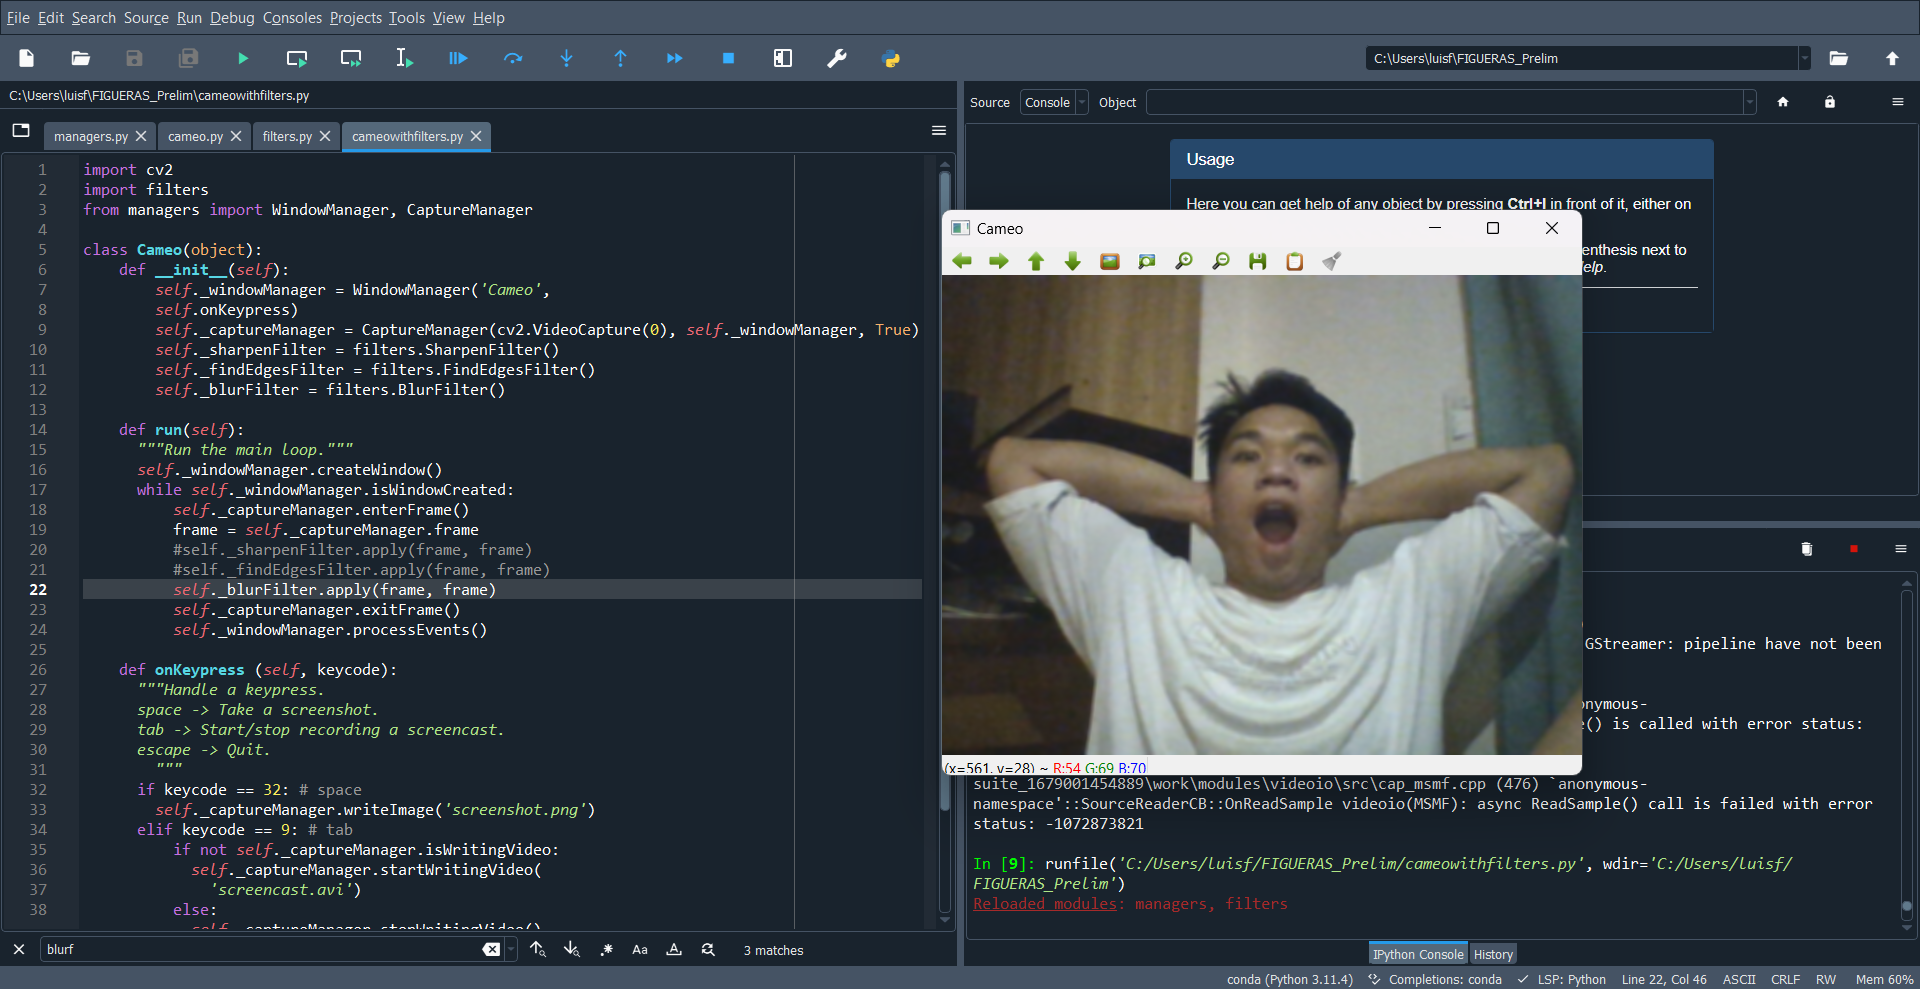

Emboss Filter:
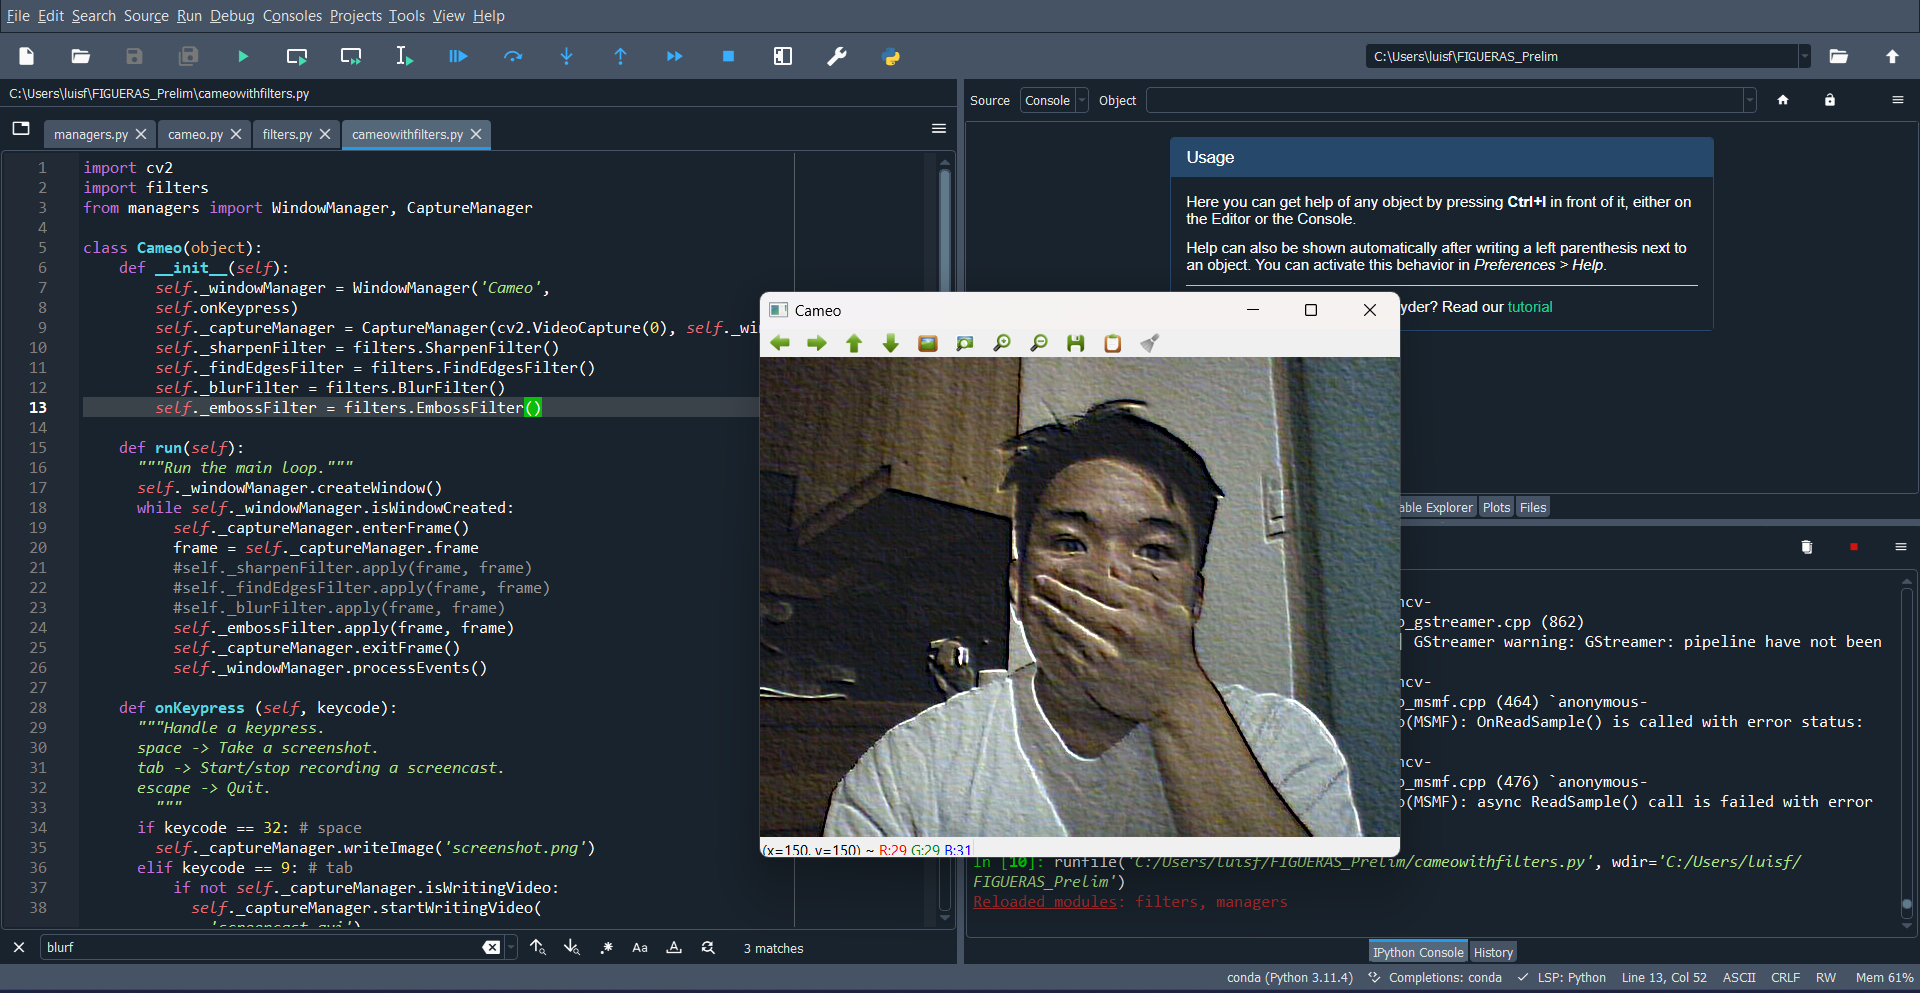

Stroke Edges Filter:
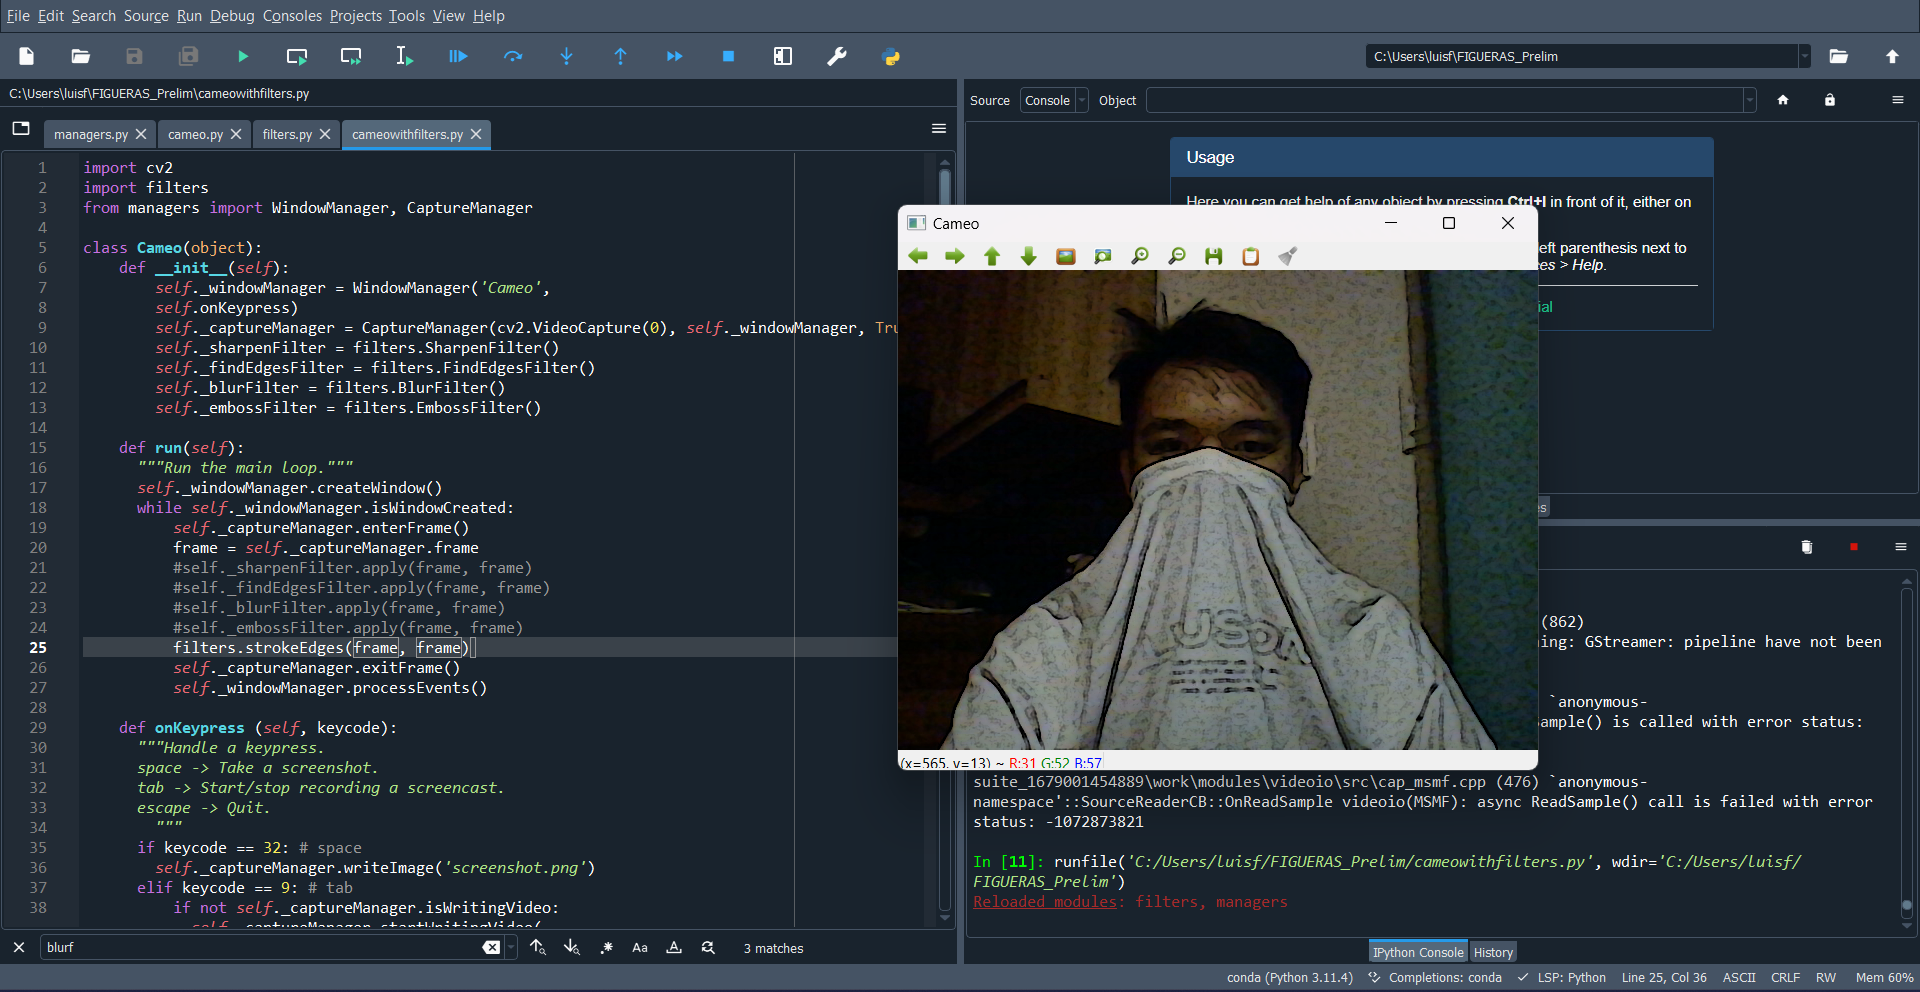

What I did here is I utilized the past modules in this course subject so that I could apply those filters to the live camera feed and get the desired outcome using the filters we used before. Modifying the codes from previous activities to match the syntax that is needed in the context of a camera feed.

###Part 2:

Implement the canny edge detection and contour detection to the live video feed. Make sure that the necessary functions/packages and modules are used. Provide an extensive analysis of your output supported by screenshots.

In [ ]:
import cv2

def CannyEdgeDetection():
  cam = cv2.VideoCapture(0)

  while True:
    ret, frame = cam.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    cv2.imshow('Cameo', edges)

    if cv2.waitKey(1) & 0xFF == 27:
      break

  cam.release()
  cv2.destroyAllWindows()

Canny Edge Detection:
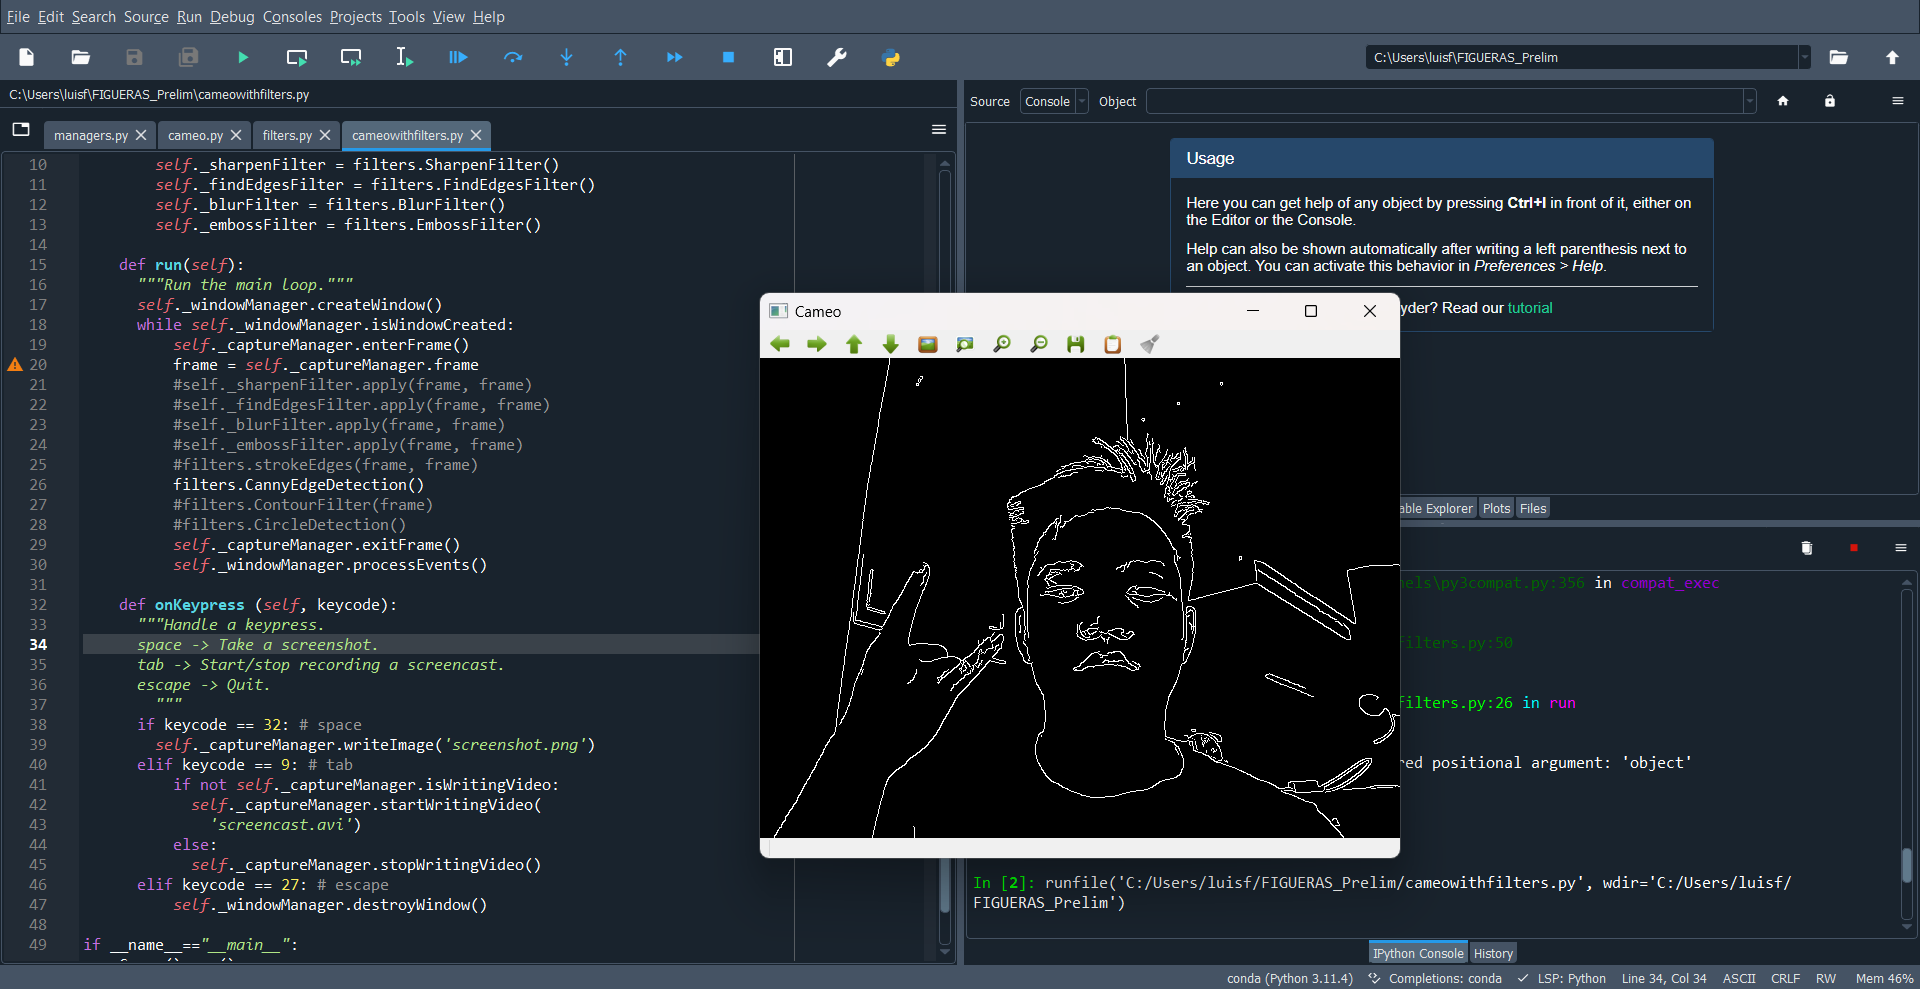

In [ ]:
def ContourFilter(vid):
  ret, thresh = cv2.threshold(cv2.cvtColor(vid.copy(), cv2.COLOR_BGR2GRAY), 180, 255, cv2.THRESH_BINARY_INV)
  contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(vid, (x,y), (x+w, y+h), (0, 255, 0), 2)
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours (vid, [box], 0, (0, 0, 255), 3)
    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int (radius)
    vid = cv2.circle(vid, center, radius, (0, 255, 0), 2)

Contour Detection:
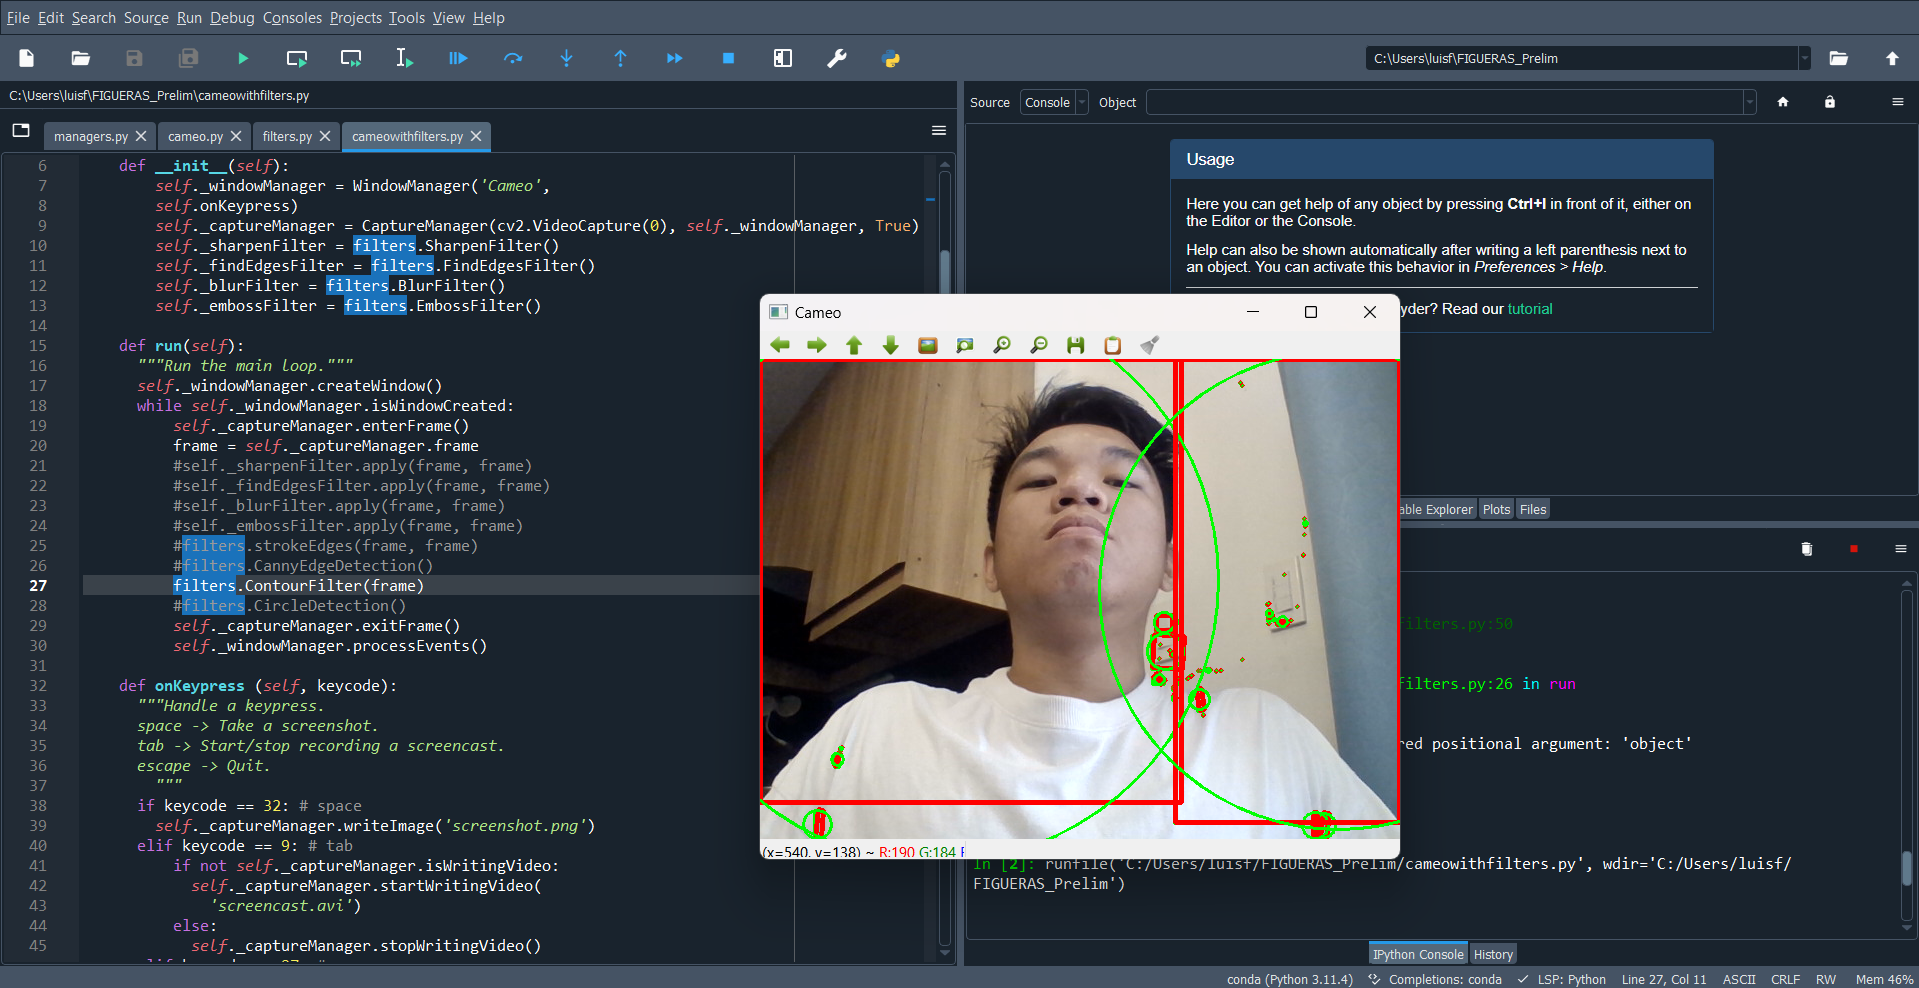

In these two detection filters, I used and modified, again, the code found in Activity 4 to apply Canny Edges and Contour Detection to the live camera feed and then took a screenshot of it.

###Part 3:

Implement circle detection to your code. What should happen now is that whenever a flat circulat object is help up to your camera, it should draw the circle on the image where the object is found. Show screenshots to support this outcome.

In [ ]:
def CircleDetection():
  cam = cv2.VideoCapture(0)

  while True:
    ret, frame = cam.read()
    if not ret:
      break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 15)

    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 99,
                                param1=120, param2=35, minRadius=0,
                                maxRadius=0)

    if circles is not None:
      circles = np.uint16(np.around(circles))
      for i in circles[0, :]:
        cv2.circle(frame, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(frame, (i[0], i[1]), 2, (0, 0, 255), 3)
    cv2.imshow('Cameo', frame)

    if cv2.waitKey(1) == 27:
      break

Circle Detection:
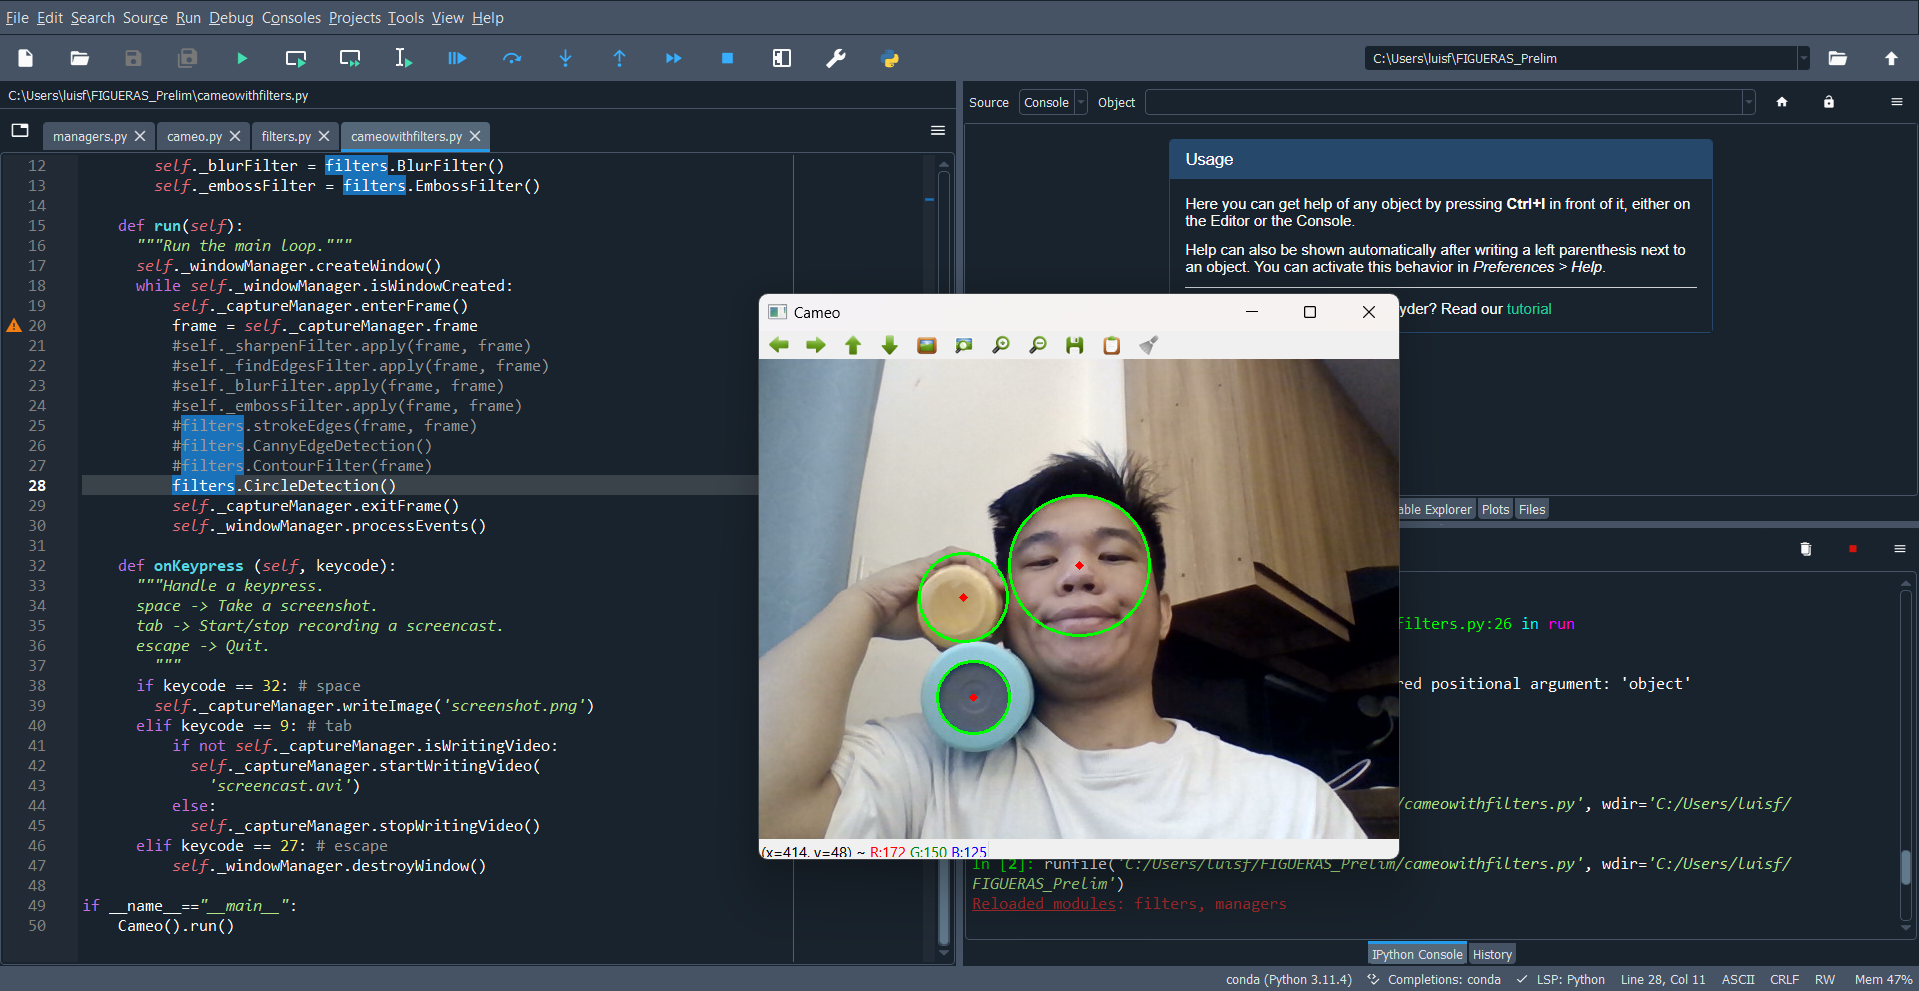

Here, I used and modified, again, the code found in Activity 5 to apply Circle Detection to the live camera feed, I used the bottom of a tumbler and Cheez Whiz jar to demonstrate how the camera feed detects circles.

##Conclusion, Summary, and Lessons Learned:

Through this Prelim Hands-on Exam, we were able to demonstrate and apply our knowledge about Computer Vision, by utilizing the past modules and activities done in the past weeks. I saw how innovative this emerging technology is and I am somehow reminded why TIP-QC wants us, Computer Engineering students, to learn more about it. Our coding skills were tested in this exam because when we get to use the past modules, it is designed for images, but now the challenge for us was on how we are going to implement it onto a live camera feed. It was a bit challenging, but seeing successful results after time-consuming debugging gives a feeling of fulfillment and accomplishment. This exam is helpful in giving us the idea of the versatility of Computer Vision, knowing that it has interdisciplinary applications, especially for me, someone who is taking the course elective data science, and now, machine learning.